In [47]:
import os
import csv
import pandas as pd
import plotly.express as px

EARTHQUAKE_PATH = "datasets/earthquakes.csv"
MAPBOX_ACCESS_KEY = "pk.eyJ1IjoibWFya21pbmtvZmYiLCJhIjoiY2tmcGxuOHBrMDBxNTJwb2VmMXFxOG0wMCJ9.pvvC0x4DbywnR3_mfi-3hw"

# READ EARTHQUAKE CSV FILE
def load_earthquake_data(earthquake_path = EARTHQUAKE_PATH):
    return pd.read_csv(earthquake_path)

# IMPORT DATA AS PANDAS DATAFRAME
df = load_earthquake_data()

In [48]:
# DATAFRAME INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [49]:
from sklearn.model_selection import train_test_split

# SPLIT THE DATA TO TEST SET
# Random sampling method
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

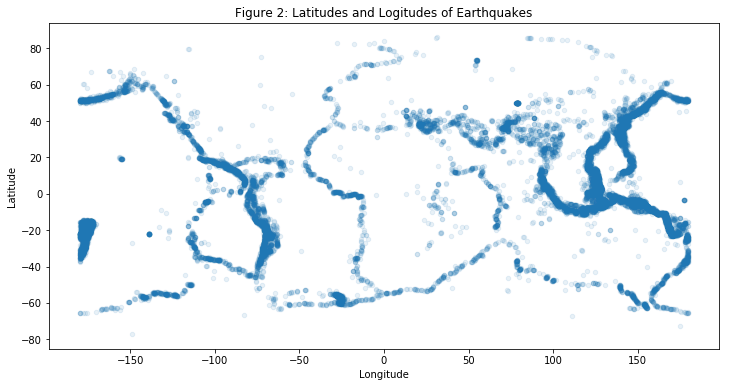

In [50]:
# Visualizing Geographical Data
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(12,6), title="Figure 2: Latitudes and Logitudes of Earthquakes")

# Display raw data on world map
px.set_mapbox_access_token(MAPBOX_ACCESS_KEY)
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Magnitude", size="Magnitude",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=5, zoom=0, title="Figure 1: Significnat Earthquakes from 1965 to 2016")
fig.show()

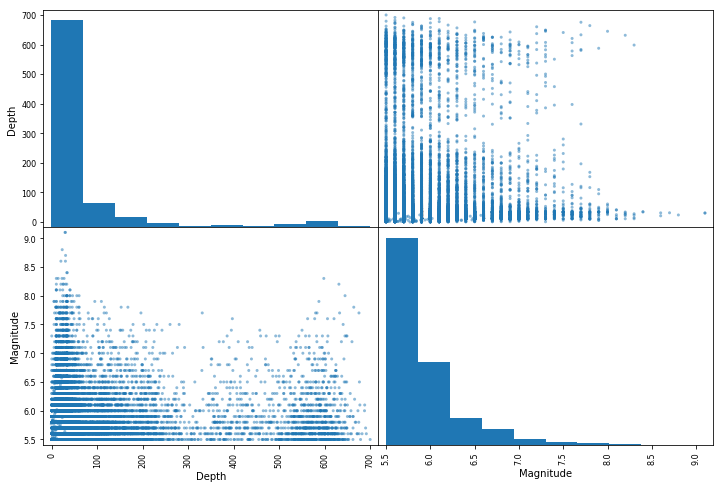

In [51]:
from pandas.plotting import scatter_matrix

# Looking for Correlations
attributes = ["Depth", "Magnitude"]
scatter_matrix(df[attributes], figsize=(12, 8))
corr_matrix = df.corr()

In [52]:
# Correlations of Depth vs other data labels
corr_matrix["Depth"].sort_values(ascending=False)

# There appears to be no significant correlation between Depth and other data labels

Depth                         1.000000
Depth Seismic Stations        0.174663
Magnitude                     0.023457
Magnitude Seismic Stations   -0.015254
Horizontal Error             -0.016467
Horizontal Distance          -0.073832
Depth Error                  -0.074609
Magnitude Error              -0.076918
Latitude                     -0.081020
Longitude                    -0.085861
Root Mean Square             -0.134002
Azimuthal Gap                -0.171162
Name: Depth, dtype: float64

In [53]:
# Correlations of Magnitude vs other data lables
corr_matrix["Magnitude"].sort_values(ascending=False)

# There appears to be a weak, positive, linear correlation between magnitude and depth seismic stations

Magnitude                     1.000000
Depth Seismic Stations        0.440582
Magnitude Error               0.135573
Root Mean Square              0.075865
Longitude                     0.038579
Latitude                      0.034987
Depth                         0.023457
Magnitude Seismic Stations   -0.003972
Horizontal Error             -0.078406
Horizontal Distance          -0.092609
Depth Error                  -0.135880
Azimuthal Gap                -0.233579
Name: Magnitude, dtype: float64